In [2]:
import pandas as pd 
import numpy as np
#! to ignore any warning
import warnings
warnings.filterwarnings('ignore')

In [3]:
path = 'C:/Users/COMPUMARTS/Downloads/DEPI/Depi_Amit_BNS3_AIS4_S1/matplotlib session/train 1.csv'

df  = pd.read_csv(path)
# df.head()

In [4]:
df.drop(['PassengerId','Name','Ticket'], axis=1,inplace=True)

In [5]:
# from read_files import read_file
# read_file(path)

In [6]:
def chk_types(df):
    dtypes =df.dtypes
    n_unique = df.nunique()
    return pd.DataFrame({"Dtypes":dtypes,"Num_uniques":n_unique}).T

In [7]:
# from process import chk_types
# chk_types(df)

In [8]:
cols = ['Survived','Pclass','Parch','Sex','Embarked','SibSp']


df[cols] = df[cols].astype('category')
chk_types(df)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
Dtypes,category,category,category,float64,category,category,float64,object,category
Num_uniques,2,3,2,88,7,7,248,147,3


In [9]:
df.shape[0]

891

In [10]:
null = df.isnull().sum()
ratio = round( (null /df.shape[0])*100 ,2).astype(str) +"%"
pd.DataFrame({"Null_sum": null, "Ratio %": ratio}).T

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
Null_sum,0,0,0,177,0,0,0,687,2
Ratio %,0.0%,0.0%,0.0%,19.87%,0.0%,0.0%,0.0%,77.1%,0.22%


In [11]:
df1 = df.dropna(subset=['Embarked'], inplace= True)
df2 = df.drop("Cabin", axis=1, inplace= True)


In [12]:
median =  df['Age'].median()
df['Age'].fillna(median, inplace= True)

In [13]:
df.head(20)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
5,0,3,male,28.0,0,0,8.4583,Q
6,0,1,male,54.0,0,0,51.8625,S
7,0,3,male,2.0,3,1,21.0750,S
8,1,3,female,27.0,0,2,11.1333,S
9,1,2,female,14.0,1,0,30.0708,C


In [14]:
null = df.isnull().sum()
ratio = round( (null /df.shape[0])*100 ,2).astype(str) +"%"
pd.DataFrame({"Null_sum": null, "Ratio %": ratio}).T

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Null_sum,0,0,0,0,0,0,0,0
Ratio %,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%


Starting visualization part from here

In [15]:
 #! sns is more customized defaultly than normal plt
import seaborn as sns 

#! the original one and more customizable by user 
import matplotlib.pyplot as plt


In [16]:
num_cols = df.select_dtypes('number').columns
print(num_cols)

Index(['Age', 'Fare'], dtype='object')


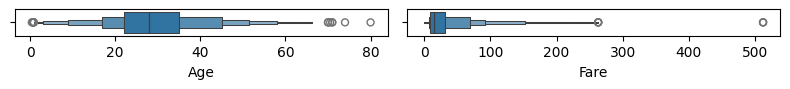

In [17]:
plt.figure(figsize=(8,1))
for i, col in enumerate(num_cols):
    plt.subplot(1 ,2, i+1)
    sns.boxenplot(df[col],orient='h')
plt.tight_layout()
plt.show()

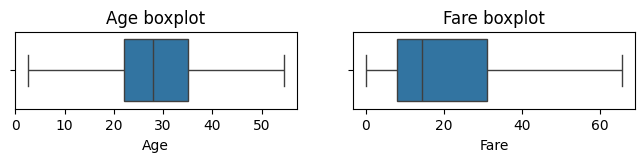

In [18]:
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    lower_outliers = df[df[col] < lower_bound][col].values
    upper_outliers = df[df[col] > upper_bound][col].values
    df[col].replace(lower_outliers, lower_bound, inplace=True)
    df[col].replace(upper_outliers, upper_bound, inplace=True)


plt.figure(figsize=(8, 1))
for idx, col in enumerate(num_cols):
    plt.subplot(1, len(num_cols), idx + 1)
    sns.boxplot(df[col], orient='h')
    plt.title(f"{col} boxplot")

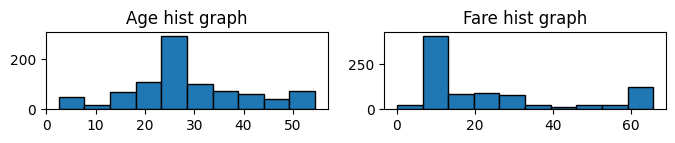

In [19]:
plt.figure(figsize=(8,1))
for i , col in enumerate(num_cols):
    plt.subplot(1,2,i+1)
    plt.hist(df[col],edgecolor='black')
    plt.title(f'{col} hist graph')

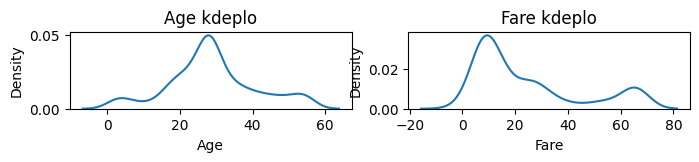

In [20]:
plt.figure(figsize=(8,1))
for i , col in enumerate(num_cols):
    plt.subplot(1,2,i+1)
    sns.kdeplot(df[col])
    plt.title(f'{col} kdeplo')

In [21]:
cat_cols=df.select_dtypes('category').columns
cat_cols

Index(['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked'], dtype='object')

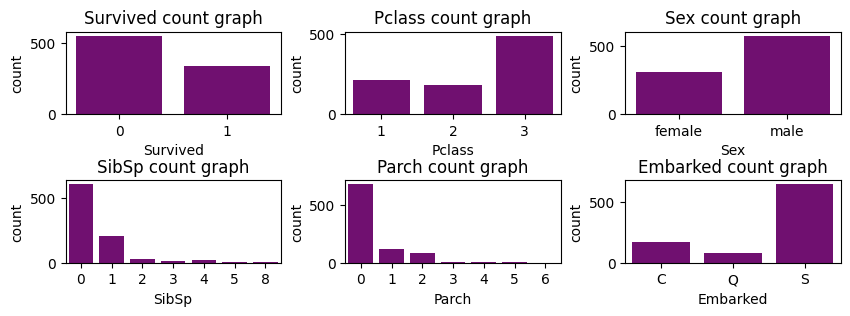

In [22]:
plt.figure(figsize=(10,3))
for i , col in enumerate(cat_cols):
    plt.subplot(2,3,i+1)
    sns.countplot(x=col,data=df,color='purple')
    plt.title(f'{col} count graph')
plt.subplots_adjust(hspace=.8,wspace=.3)
plt.show()

In [23]:
unique=df['Survived'].value_counts()
count=unique.values
cat=unique.index
cat

CategoricalIndex([0, 1], categories=[0, 1], ordered=False, dtype='category', name='Survived')

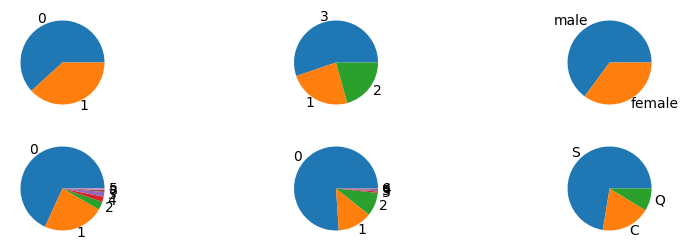

In [24]:
plt.figure(figsize=(10,3))
for i , col in enumerate(cat_cols):
    plt.subplot(2,3,i+1)
    #the count of each category
    unique=df[col].value_counts()
    count=unique.values
    categories=unique.index
          #size of every pie       give name to each pie
    plt.pie(count,                labels=categories)
    

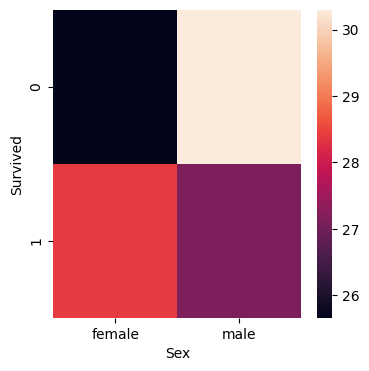

In [25]:
plt.figure(figsize=(4,4))
agg=df.pivot_table(index='Survived',columns='Sex',values='Age',aggfunc='mean')
sns.heatmap(agg,)
plt.show()

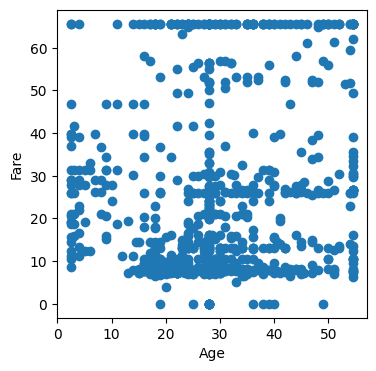

In [26]:
plt.figure(figsize=(4,4))
plt.scatter(df['Age'],df['Fare'])
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()

In [27]:
 #! here we dropped all duplicates
i=df[df.duplicated()].index
print(i)
# df = df.drop(i)

Index([ 47,  55,  76,  77,  87,  95, 101, 105, 121, 133,
       ...
       846, 849, 859, 863, 868, 870, 877, 878, 884, 886],
      dtype='int64', length=129)


<Axes: xlabel='Sex', ylabel='count'>

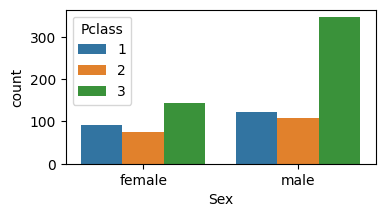

In [28]:
plt.figure(figsize=(4,2))
sns.countplot(x=df['Sex'],hue=df['Pclass'])

<Axes: ylabel='Sex'>

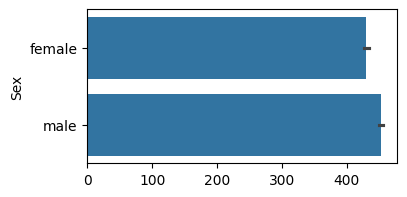

In [29]:
plt.figure(figsize=(4,2))
sns.barplot(data=df['Sex'],ci=20)


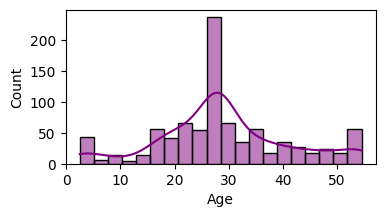

In [30]:
plt.figure(figsize=(4,2))
ax=sns.histplot(data=df['Age'],color='purple',kde=True)
plt.show()

Data normalization

In [31]:
x=df.drop('Survived',axis=1)
y=df['Survived']

In [32]:
from sklearn.preprocessing import MinMaxScaler

In [33]:
scaler=MinMaxScaler()
num_cols=x.select_dtypes('number').columns
scaler.fit(x[num_cols])
x[num_cols]=scaler.transform(x[num_cols])


In [34]:
x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,0.375000,1,0,0.110424,S
1,1,female,0.682692,1,0,1.000000,C
2,3,female,0.451923,0,0,0.120704,S
3,1,female,0.625000,1,0,0.808757,S
4,3,male,0.625000,0,0,0.122608,S


In [35]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: category
Categories (2, int64): [0, 1]

In [36]:
from category_encoders import OneHotEncoder

In [37]:
strcols=['Sex','Embarked']
encoder=OneHotEncoder(cols=strcols, drop_invariant=True)
X=encoder.fit_transform(x)

In [38]:
import plotly.subplots as sp
import plotly.graph_objects as go

#!interactive graphics
import plotly.express as px

In [39]:
fig=px.pie(df,
       names='Survived',
    #    title='Survived',
       color_discrete_sequence=px.colors.qualitative.Vivid,
       hole=.7,
       #here we controlled which one will come first
       category_orders={'Survived':[0,1]},
       
       #!used 'color=' to identify which pie or column will be colored for 'color_discrete_map='
    #    color='Survived',
    #    color_discrete_map={0:'purple',1:'green'}
       )


fig.update_layout(annotations=[dict(text='Survived'
                                    ,font=dict(size=30,family='arial black',color='black')
                                    ,x=.5, y=.5,
                                    showarrow=False)])

In [40]:
px.scatter(df,x='Age',y='Fare',title='Age to Fare'
           ,labels={"Age":"Age",'Fare':'Fare'}
           ,opacity=.8
           )

In [41]:
print(df.columns)
AF_corr=df[['Age','Fare']].corr()
AF_corr

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')


,Age,Fare
Age,1.000000,0.139065
Fare,0.139065,1.000000


In [42]:
fig=px.imshow(AF_corr,
          text_auto=True
          ,color_continuous_scale='blues'
          ,title='correlation heatmap')

fig.update_layout(
                   width=800
                  ,height=400
                  ,xaxis_title='fearutes'
                  ,yaxis_title='features y'
                  )

In [ ]:
# px.histogram(df,x='Sex',y='Survived',color='Sex')
px.histogram(df,x='Sex',color='Survived',text_auto=True)

In [44]:

fig = px.histogram(df
                   ,x="Sex"
                   ,color="Survived"
                   ,barmode="group"
                   ,histnorm="percent"
                   ,text_auto=True,color_discrete_sequence=px.colors.qualitative.Pastel
                   ,labels={'Survived':'Survival Status'}
                   ,title='<b>Survived based on gender'
                   )

fig.update_layout(width=1000,height=400
                  ,font=dict(size=15,family='arial black')
                  ,bargap=0.2
                  )
fig.show()

In [45]:
from plotly.subplots import make_subplots

# Create a subplot grid with 2 rows and 3 columns
fig = make_subplots(rows=2, cols=3, subplot_titles=cat_cols)

for i, col in enumerate(cat_cols):
    row = i // 3 + 1
    col_pos = i % 3 + 1

    counts = df[col].value_counts().reset_index()
    counts.columns = [col, 'count']

    fig.add_trace(
        go.Bar(x=counts[col],
               y=counts['count'],
               name=col),
        row=row, col=col_pos
    )

fig.update_layout(title_text='count graphs'
                  ,showlegend=False)


fig.update_layout(height=600, width=1000, showlegend=False)
fig.show()

Dash

In [46]:
from dash import Dash, html, dcc, Input, Output

In [47]:
app=Dash()
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,65.6563,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,28.0,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C
